<a href="https://colab.research.google.com/github/shanaka-desoysa/shanaka-desoysa.github.io/blob/source/content/hello/MNIST_Hello_World2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello World to Deep Learning using MNIST Dataset

### Loading MNIST dataset

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


### Training data

In [2]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


### Test Data

In [3]:
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


### Neural Network Architecture

In [4]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


### Compilation Step

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Preparing Image Data

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### Preparing the Labels

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Training the Network

In [8]:
history =  network.fit(train_images, train_labels, epochs=10, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.2538 - acc: 0.9270
Epoch 2/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.1047 - acc: 0.9688
Epoch 3/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.0679 - acc: 0.9799
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0491 - acc: 0.9853
Epoch 5/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0372 - acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0283 - acc: 0.9917
Epoch 7/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0218 - acc: 0.9936
Epoch 8/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0174 - acc: 0.9947
Epoch 9/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.0131 - acc: 0.9964
Epoch 10/10
60000/60000 [===========================

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

### Plot Training Loss

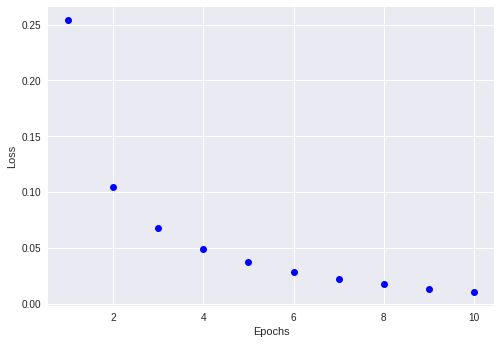

In [10]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
#val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
#plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

### Plot Training Accuracy

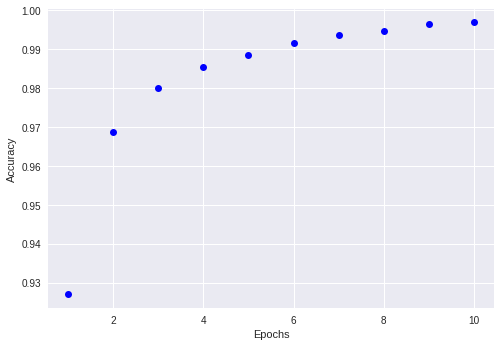

In [11]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
#plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

### Evaluate the Network

In [12]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 48us/step
test_loss: 0.07121012202903367
test_acc: 0.9803


### Predict the Values

In [0]:
predicted = network.predict(test_images)

### Test Some Random Images

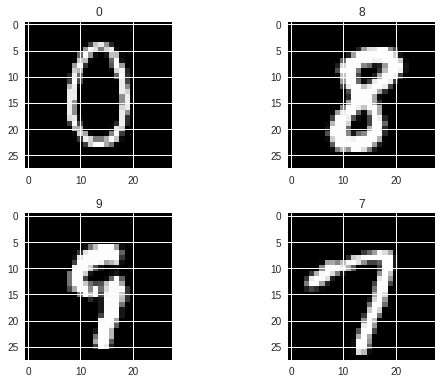

In [14]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

for i in range(0, 4):
    rnd_img = randint(0, 10000)
    splt = plt.subplot(221 + (i%4))
    plt.tight_layout()
    splt.set_title(np.argmax(predicted[rnd_img]))
    imgplot = plt.imshow(image.array_to_img(test_images[rnd_img].reshape(28,28,1)))

plt.show()